In [2]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

# Section (a.)

### Part (i.) - (iv.) Polyak, RMSProp, Heavy Ball, ADAM

### First Define some functions 

In [ ]:
# function: 1*(x-2)^4+5*(y-5)^2
# function: Max(x-2,0)+5*|y-5|

x = sympy.symbols('x', real=True)
y = sympy.symbols('y', real=True)

f1    = 1*((x-2)**4) + 5*(y-5)**2 
df1dx = sympy.diff(f1,x)
df1dy = sympy.diff(f1,y)  

f2    = sympy.Max(x-2, 0) + 5*sympy.Abs(y-5)
df2dx = sympy.diff(f2, x)
df2dy = sympy.diff(f2, y)


f1_      = sympy.lambdify((x, y), f1, 'numpy')
grad_f1_ = sympy.lambdify((x, y), [df1dx, df1dy], 'numpy')

f2_      = sympy.lambdify((x, y), f2, 'numpy')
grad_f2_ = sympy.lambdify((x, y), [df2dx, df2dy], 'numpy')


#print(df2dy)

5*sign(y - 5)


## Polyak

In [ ]:
def Polyak(f, grad_f, f_min, X, num_iters=50, epsilon=1e-4):
    x = np.array(X, dtype=float) # X is the input vector (counterintuitively it stores x and y)
    Trajectory = [x] # For storing the trajectory of x
    F = [f(*x)]


    for _ in range(num_iters):

        grad = np.array(grad_f(*x))

        grad_magnitude = np.dot(grad, grad)

        step = (f(*x) - f_min)/(grad_magnitude + epsilon)

        x = x - step*grad

        
        Trajectory.append(x)
        F.append(f(*x))
    
    return np.array(Trajectory), np.array(F)

## RMSProp

In [19]:
def RMSProp(f, grad_f, X, alpha=0.01, beta=0.9, num_iters=50, epsilon=1e-4):
    x = np.array(X, dtype=float) # X is the input vector (counterintuitively it stores x and y)
    Trajectory = [x] # For storing the trajectory of x
    F = [f(*x)]


    sum_of_decayed_squared_grads = np.zeros_like(x)

    for _ in range(num_iters):

        grad = np.array(grad_f(*x))

        sum_of_decayed_squared_grads = beta*sum_of_decayed_squared_grads + (1 - beta)*grad**2

        step = (alpha)/(np.sqrt(sum_of_decayed_squared_grads) + epsilon) # A vector of step sizes, one for each input variable

        x = x - step*grad

        
        Trajectory.append(x)
        F.append(f(*x))
    
    return np.array(Trajectory), np.array(F)

In [21]:
def HeavyBall(f, grad_f, X, alpha=0.01, beta=0.9, num_iters=50, epsilon=1e-4):
    x = np.array(X, dtype=float) # X is the input vector (counterintuitively it stores x and y)
    Trajectory = [x] # For storing the trajectory of x
    F = [f(*x)]


    v = np.zeros_like(x)

    for _ in range(num_iters):

        grad = np.array(grad_f(*x))

        v = beta*v - alpha*grad

        x = x + v

        Trajectory.append(x)
        F.append(f(*x))
    
    return np.array(Trajectory), np.array(F)

In [ ]:
def Adam(f, grad_f, X, alpha=0.01, beta_1=0.9, beta_2 = 0.999, num_iters=50, epsilon=1e-4):
    x = np.array(X, dtype=float) # X is the input vector (counterintuitively it stores x and y)
    Trajectory = [x] # For storing the trajectory of x
    F = [f(*x)]


    v = np.zeros_like(x)
    m = np.zeros_like(x)


    for t in range(1, num_iters + 1):

        grad = np.array(grad_f(*x))

        m = beta_1 * m + (1 - beta_1) * grad

        v = beta_2*v + (1 - beta_2)*(grad**2)

        step = m/(np.sqrt(v) + epsilon)

        x = x - alpha*step

        Trajectory.append(x)
        F.append(f(*x))
    
    return np.array(Trajectory), np.array(F)

# Section (b.)

### Part (i.) RMSProp

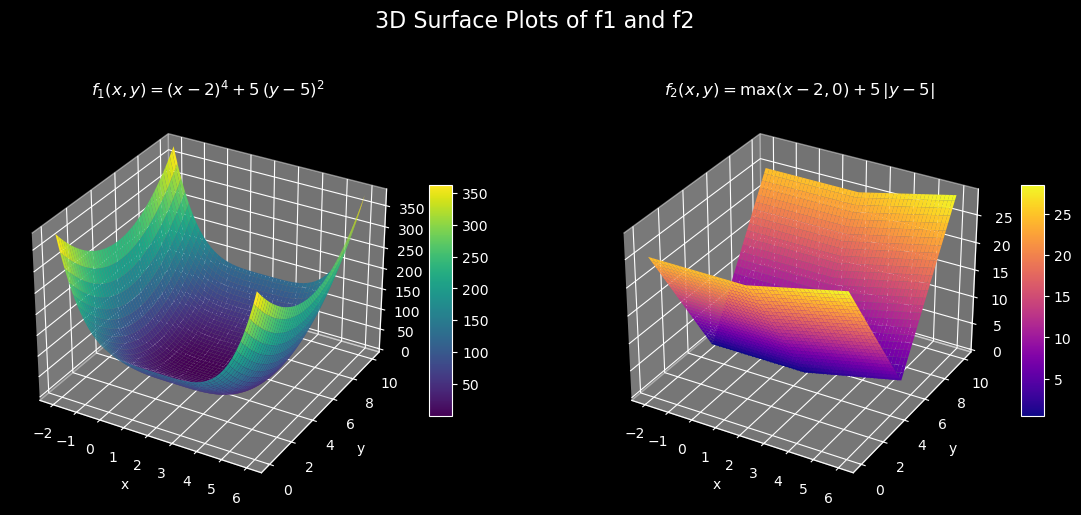

In [ ]:
plt.style.use('dark_background')



x_vals = np.linspace(-2, 6, 200)
y_vals = np.linspace(0, 10, 200)
X, Y = np.meshgrid(x_vals, y_vals)


f1 = (X - 2)**4 + 5*(Y - 5)**2
f2 = np.maximum(X - 2, 0) + 5*np.abs(Y - 5)


fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax1.plot_surface(X, Y, f1, cmap='viridis', edgecolor='none')
ax1.set_title(r'$f_1(x,y)=(x-2)^4+5\,(y-5)^2$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f1')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10)


ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf2 = ax2.plot_surface(X, Y, f2, cmap='plasma', edgecolor='none')
ax2.set_title(r'$f_2(x,y)=\max(x-2,0)+5\,|y-5|$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f2')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10)

plt.suptitle("3D Surface Plots of f1 and f2", fontsize=16)
plt.show()

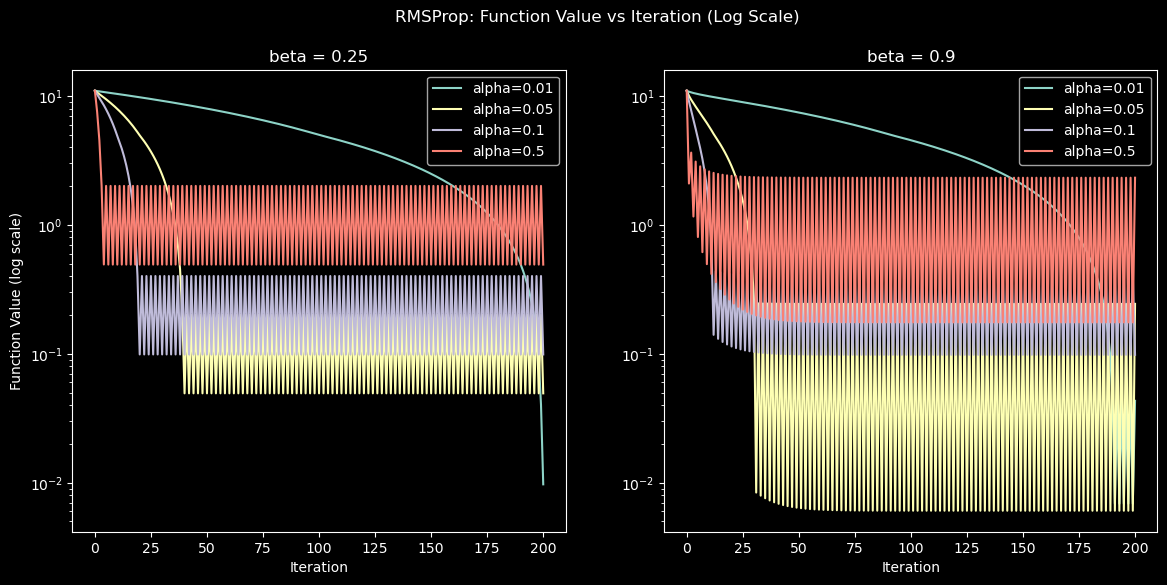

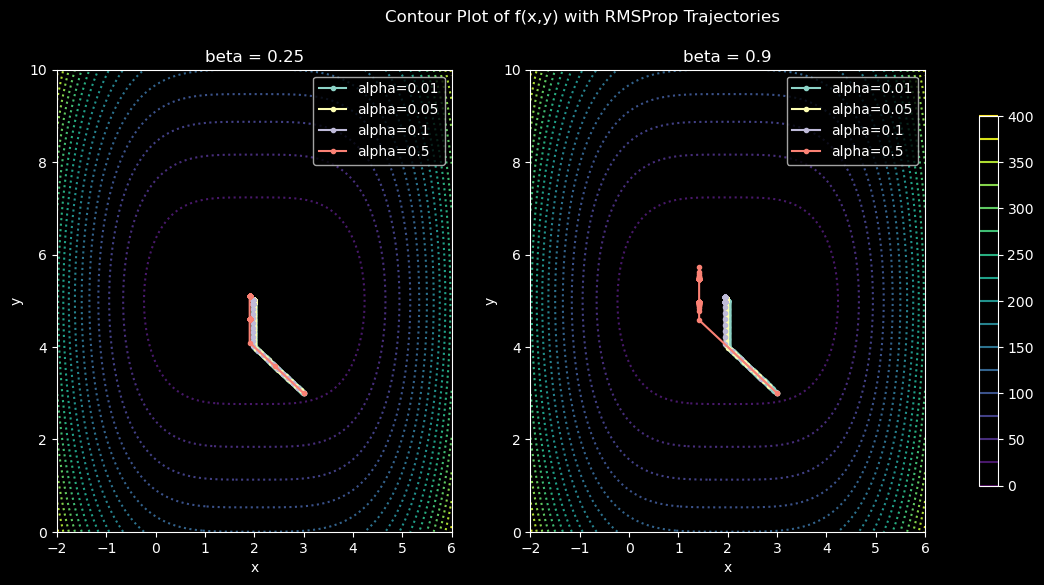

In [ ]:
beta_values = [0.25, 0.9]            
alpha_values = [0.01, 0.05, 0.1, 0.5]  
X0 = [3, 3]                          # Initial condition
num_iters = 200

f = f2_
grad = grad_f2_

results = {}
trajectories = {}

for beta in beta_values:
    for alpha in alpha_values:
        traj, F_vals = RMSProp(f, grad, X0, alpha=alpha, beta=beta, num_iters=num_iters, epsilon=1e-4)
        results[(beta, alpha)] = F_vals
        trajectories[(beta, alpha)] = traj


fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
for i, beta in enumerate(beta_values):
    ax = axs[i]
    for alpha in alpha_values:
        label_str = f"alpha={alpha}"
        ax.plot(results[(beta, alpha)], label=label_str)
    ax.set_xlabel("Iteration")
    ax.set_title(f"beta = {beta}")
    ax.set_yscale('log')
    ax.tick_params(axis='y', labelleft=True)  
    ax.legend()
axs[0].set_ylabel("Function Value (log scale)")
plt.suptitle("RMSProp: Function Value vs Iteration (Log Scale)")
plt.show()





trajectories = {}
for beta in beta_values:
    for alpha in alpha_values:
        traj, _ = RMSProp(f, grad, X0, alpha=alpha, beta=beta, num_iters=num_iters, epsilon=1e-4)
        trajectories[(beta, alpha)] = traj

x_vals = np.linspace(-2, 6, 400)
y_vals = np.linspace(0, 10, 400)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z = f1_(X_grid, Y_grid)


fig, axs = plt.subplots(1, 2, figsize=(14, 6))
for i, beta in enumerate(beta_values):
    ax = axs[i]

    ax.set_facecolor('black')

    cset = ax.contour(X_grid, Y_grid, Z, levels=15, cmap='viridis', linestyles='dotted')
    

    for alpha in alpha_values:
        traj = trajectories[(beta, alpha)]
        ax.plot(traj[:, 0], traj[:, 1], marker='o', markersize=3, label=f"alpha={alpha}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"beta = {beta}")
    ax.legend()

fig.colorbar(cset, ax=axs, orientation='vertical', shrink=0.8)
plt.suptitle("Contour Plot of f(x,y) with RMSProp Trajectories")
plt.show()


# Same Thing Heavy Ball

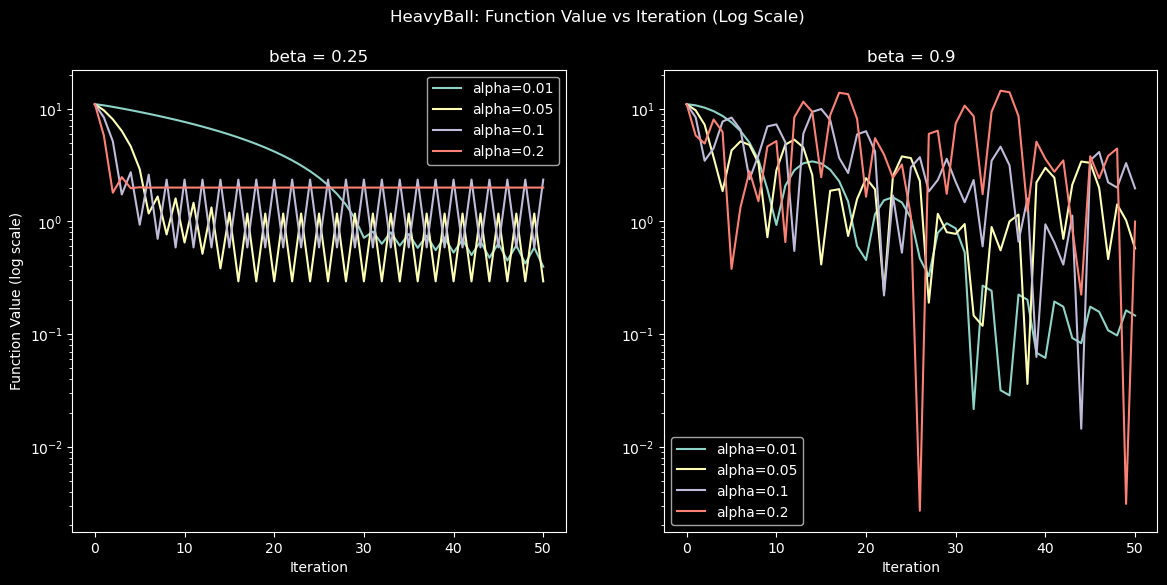

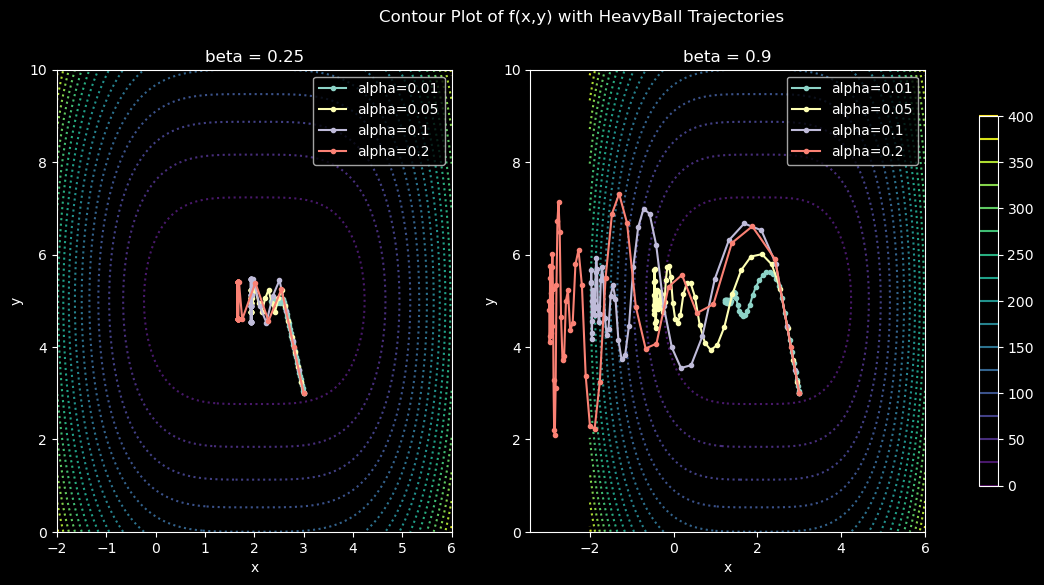

In [ ]:
beta_values = [0.25, 0.9]            
alpha_values = [0.01, 0.05, 0.1, 0.2]  
X0 = [3, 3]                          # Initial condition
num_iters = 50

f = f2_
grad = grad_f2_

results = {}
trajectories = {}

for beta in beta_values:
    for alpha in alpha_values:
        traj, F_vals = HeavyBall(f, grad, X0, alpha=alpha, beta=beta, num_iters=num_iters, epsilon=1e-4)
        results[(beta, alpha)] = F_vals
        trajectories[(beta, alpha)] = traj


fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
for i, beta in enumerate(beta_values):
    ax = axs[i]
    for alpha in alpha_values:
        label_str = f"alpha={alpha}"
        ax.plot(results[(beta, alpha)], label=label_str)
    ax.set_xlabel("Iteration")
    ax.set_title(f"beta = {beta}")
    ax.set_yscale('log')
    ax.tick_params(axis='y', labelleft=True) 
    ax.legend()
axs[0].set_ylabel("Function Value (log scale)")
plt.suptitle("HeavyBall: Function Value vs Iteration (Log Scale)")
plt.show()





trajectories = {}
for beta in beta_values:
    for alpha in alpha_values:
        traj, _ = HeavyBall(f, grad, X0, alpha=alpha, beta=beta, num_iters=num_iters, epsilon=1e-4)
        trajectories[(beta, alpha)] = traj

x_vals = np.linspace(-2, 6, 400)
y_vals = np.linspace(0, 10, 400)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z = f1_(X_grid, Y_grid)


fig, axs = plt.subplots(1, 2, figsize=(14, 6))
for i, beta in enumerate(beta_values):
    ax = axs[i]

    ax.set_facecolor('black')

    cset = ax.contour(X_grid, Y_grid, Z, levels=15, cmap='viridis', linestyles='dotted')
    

    for alpha in alpha_values:
        traj = trajectories[(beta, alpha)]
        ax.plot(traj[:, 0], traj[:, 1], marker='o', markersize=3, label=f"alpha={alpha}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"beta = {beta}")
    ax.legend()

fig.colorbar(cset, ax=axs, orientation='vertical', shrink=0.8)
plt.suptitle("Contour Plot of f(x,y) with HeavyBall Trajectories")
plt.show()


# Yuh Adam

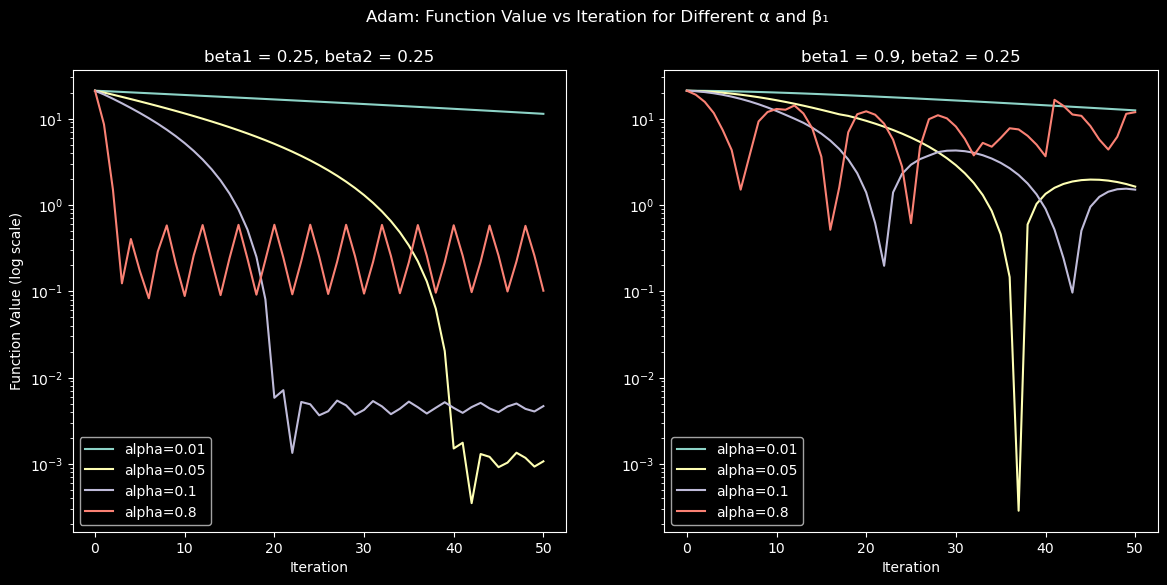

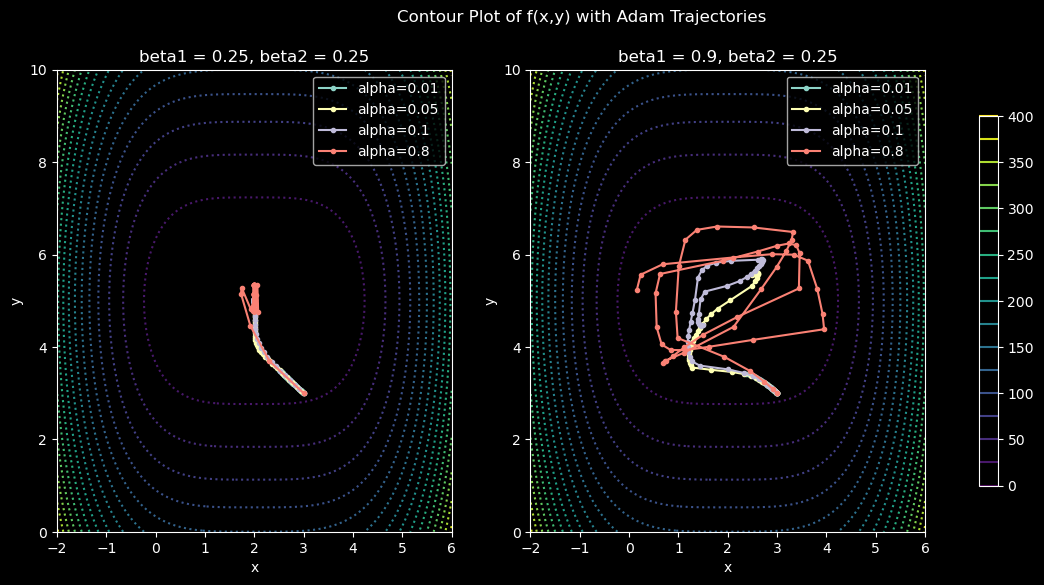

In [81]:
beta1_values = [0.25, 0.9]                
alpha_values = [0.01, 0.05, 0.1, 0.8]       
beta2 = 0.25                            
X0 = [3, 3]                              
num_iters = 50


results = {}
trajectories = {}

for beta1 in beta1_values:
    for alpha in alpha_values:
        traj, F_vals = Adam(f1_, grad_f1_, X0, alpha=alpha, beta_1=beta1, beta_2=beta2, num_iters=num_iters, epsilon=1e-4)
        results[(beta1, alpha)] = F_vals
        trajectories[(beta1, alpha)] = traj


fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
for i, beta1 in enumerate(beta1_values):
    ax = axs[i]
    for alpha in alpha_values:
        label_str = f"alpha={alpha}"
        ax.plot(results[(beta1, alpha)], label=label_str)
    ax.set_xlabel("Iteration")
    ax.set_title(f"beta1 = {beta1}, beta2 = {beta2}")
    ax.set_yscale('log')
    ax.tick_params(axis='y', labelleft=True)
    ax.legend()
axs[0].set_ylabel("Function Value (log scale)")
plt.suptitle("Adam: Function Value vs Iteration for Different α and β₁")
plt.show()


x_vals = np.linspace(-2, 6, 400)
y_vals = np.linspace(0, 10, 400)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z = f1_(X_grid, Y_grid)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
for i, beta1 in enumerate(beta1_values):
    ax = axs[i]
    ax.set_facecolor('black')

    cset = ax.contour(X_grid, Y_grid, Z, levels=15, cmap='viridis', linestyles='dotted')
    for alpha in alpha_values:
        traj = trajectories[(beta1, alpha)]
        ax.plot(traj[:, 0], traj[:, 1], marker='o', markersize=3, label=f"alpha={alpha}")

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"beta1 = {beta1}, beta2 = {beta2}")
    ax.legend()
fig.colorbar(cset, ax=axs, orientation='vertical', shrink=0.8)
plt.suptitle("Contour Plot of f(x,y) with Adam Trajectories")
plt.show()

# uh oh

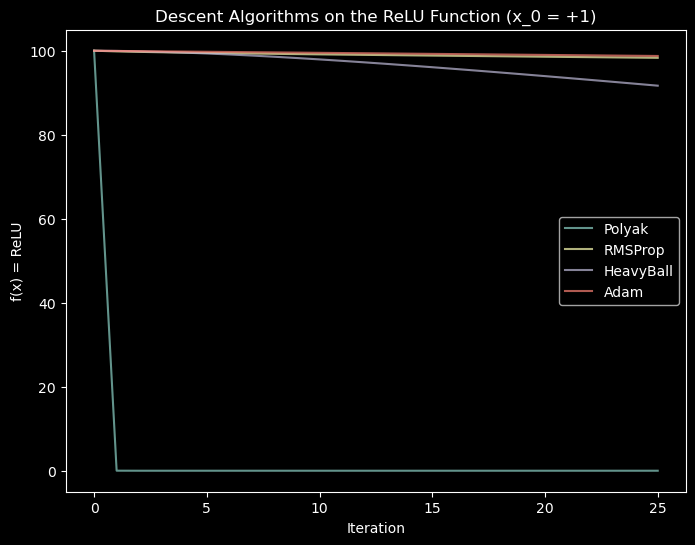

In [ ]:
def relu(x):
    return np.maximum(0, x)

def grad_relu(x):

    return 1.0 if x > 0 else 0.0

initial_x = [100]
num_iters = 25
f_min = 0.0       

traj_polyak, F_polyak = Polyak(relu, grad_relu, f_min, initial_x, num_iters=num_iters)
traj_rmsprop, F_rmsprop = RMSProp(relu, grad_relu, initial_x, num_iters=num_iters)
traj_heavyball, F_heavyball = HeavyBall(relu, grad_relu, initial_x, num_iters=num_iters)
traj_adam, F_adam = Adam(relu, grad_relu, initial_x, num_iters=num_iters)


plt.figure(figsize=(8, 6))
plt.plot(F_polyak, label="Polyak", alpha=0.7)
plt.plot(F_rmsprop, label="RMSProp", alpha=0.7)
plt.plot(F_heavyball, label="HeavyBall", alpha=0.7)
plt.plot(F_adam, label="Adam", alpha=0.7)
plt.xlabel("Iteration")
plt.ylabel("f(x) = ReLU")
plt.title("Descent Algorithms on the ReLU Function (x_0 = +100)")
plt.legend()
plt.show()